In [65]:
import os 
import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pathlib
import imageio

In [66]:
path = "/kaggle/input/cassava-leaf-disease-classification/"

In [67]:
path_train = os.path.join(path, "train_images" )
path_test = os.path.join(path, "train_images")
# submit_path = path_test = os.path.join(path, "submit.csv")

In [68]:
df_train = pd.read_csv("/kaggle/input/cassava-leaf-disease-classification/train.csv")
df_train['imagepath']= path_train+'/'+df_train['image_id']

In [69]:
pd.set_option('max_colwidth', 200)

In [70]:
df_train

,image_id,label,imagepath
0,1000015157.jpg,0,/kaggle/input/cassava-leaf-disease-classification/train_images/1000015157.jpg
1,1000201771.jpg,3,/kaggle/input/cassava-leaf-disease-classification/train_images/1000201771.jpg
2,100042118.jpg,1,/kaggle/input/cassava-leaf-disease-classification/train_images/100042118.jpg
3,1000723321.jpg,1,/kaggle/input/cassava-leaf-disease-classification/train_images/1000723321.jpg
4,1000812911.jpg,3,/kaggle/input/cassava-leaf-disease-classification/train_images/1000812911.jpg
...,...,...,...
21392,999068805.jpg,3,/kaggle/input/cassava-leaf-disease-classification/train_images/999068805.jpg
21393,999329392.jpg,3,/kaggle/input/cassava-leaf-disease-classification/train_images/999329392.jpg
21394,999474432.jpg,1,/kaggle/input/cassava-leaf-disease-classification/train_images/999474432.jpg
21395,999616605.jpg,4,/kaggle/input/cassava-leaf-disease-classification/train_images/999616605.jpg


In [71]:
import IPython
from IPython.display import display
from PIL import Image

The image size is: (800, 600)


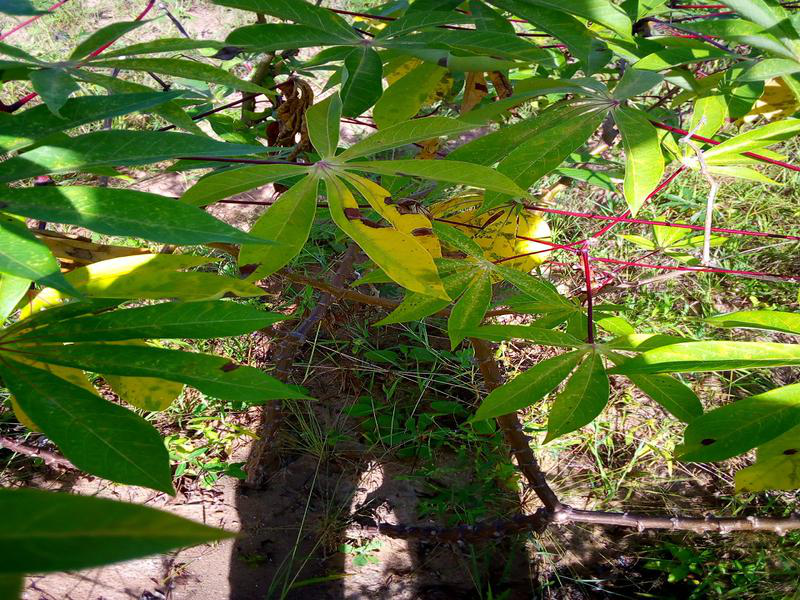

In [72]:
# open the image
img = Image.open('../input/cassava-leaf-disease-classification/train_images/1000015157.jpg')
# Get the image size
img_size = img.size

print("The image size is: {}".format(img_size))

# Just having the image as the last line in the cell will display it in the notebook
img

In [74]:
# What version of Python do you have?
import sys
import tensorflow.keras
import sklearn as sk
import tensorflow as tf
import pandas as pd

from tensorflow.keras.models import Model
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(f"Tensorflow Version : {tf.__version__}")
print(f"Tensor Flow Keras Version : {tensorflow.keras.__version__}" )
print("GPU is", "available" if tf.test.is_gpu_available()\
             else "Not Available")

Tensorflow Version : 2.3.1
Tensor Flow Keras Version : 2.4.0
GPU is available


In [75]:
df_train.rename(columns = {'image_id':'filename'}, inplace = True)
df_train['label'] = df_train['label'].apply(lambda x: "'" + str(x) + "'")

In [76]:
f = open('../input/cassava-leaf-disease-classification/label_num_to_disease_map.json',) 
labels = json.load(f)
labels

{'0': 'Cassava Bacterial Blight (CBB)',
 '1': 'Cassava Brown Streak Disease (CBSD)',
 '2': 'Cassava Green Mottle (CGM)',
 '3': 'Cassava Mosaic Disease (CMD)',
 '4': 'Healthy'}

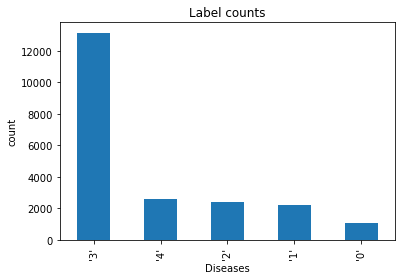

In [77]:
# see distribution of data

df_train.label.value_counts().plot(kind='bar')
plt.title('Label counts')
plt.xlabel('Diseases')
plt.ylabel('count')
plt.show()

In [78]:
df_train_cut, df_validate_cut = train_test_split(df_train, 
                                test_size = .2, random_state = 42)

In [79]:
print(f"Training Size : {len(df_train_cut)}")
print(f"Validation Size : {len(df_validate_cut)}")

Training Size : 17117
Validation Size : 4280


In [80]:
def get_image_path(filename):
    return os.path.join(path, f"{filename}.jpg")

In [51]:
def check_remove_defective_images(df):
    print(path+row['filename'])

In [59]:
df_train_cut['id'] = df_train_cut.filename.str[:-4]
df_train_cut.set_index('id')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
import tensorflow as tf 
import keras_preprocessing 
from keras_preprocessing import image 
from keras_preprocessing.image import ImageDataGenerator

width = int(800)
height = int(600)

train_generator = training_datagen.flow_from_dataframe(
         dataframe = df_train_cut,
         directory= path,
         x_col = df_train_cut['imagepath'],
         y_col = 'label',
         label_mode = "int",
         target_size =(height, width),
         batch_size = 32)
                

KeyError: "None of [Index(['/kaggle/input/cassava-leaf-disease-classification/train_images/3619673783.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/3386628365.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/3022167144.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/2551245450.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/1837309847.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/1442929249.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/1852547447.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/3554722517.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/2800642069.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/3185750323.jpg',\n       ...\n       '/kaggle/input/cassava-leaf-disease-classification/train_images/3028711047.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/3579904762.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/1789849638.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/4032292698.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/2123323431.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/3015865216.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/314175675.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/1960063101.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/1147602192.jpg', '/kaggle/input/cassava-leaf-disease-classification/train_images/3841961758.jpg'],\n      dtype='object', length=17117)] are in the [columns]"

In [21]:
train_generator = training_datagen.flow_from_dataframe(
         dataframe = df_train_cut,
         directory= path,
      )

NameError: name 'df_train_cut' is not defined

In [25]:

validation_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = validation_datagen.flow_from_dataframe(
        dataframe = df_validate_cut,
        directory = path,
        x_col = 'image_id',
        y_col = 'label',
        target_size = (height, width),
        batch_size = 32, 
        class_mode = 'binary')

NameError: name 'df_train_cut' is not defined